In [3]:
import pandas as pd
df=pd.read_csv('ped_crashes.csv')
print(df)

      Crash Year Crash Month  Crash Day            Time of Day Day of Week  \
0           2018    February          1     9:00 AM - 10:00 AM    Thursday   
1           2018    February          1      7:00 PM - 8:00 PM    Thursday   
2           2018    February          1  11:00 AM - 12:00 noon    Thursday   
3           2018    February          1      6:00 PM - 7:00 PM    Thursday   
4           2018       March          1      2:00 PM - 3:00 PM    Thursday   
...          ...         ...        ...                    ...         ...   
6804        2010        July         31      2:00 AM - 3:00 AM    Saturday   
6805        2010      August         31      2:00 PM - 3:00 PM     Tuesday   
6806        2010     October         31      8:00 PM - 9:00 PM      Sunday   
6807        2010    December         31      1:00 PM - 2:00 PM      Friday   
6808        2010    December         31    10:00 PM - 11:00 PM      Friday   

            City or Township     Crash: Intersection Crash: Hit

In [5]:
new_df=df['Crash Year'].value_counts()
print(new_df)

2018    822
2015    801
2011    797
2013    788
2014    765
2010    755
2017    723
2012    707
2016    651
Name: Crash Year, dtype: int64


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] [755, 797, 707, 788, 765, 801, 651, 723, 822]


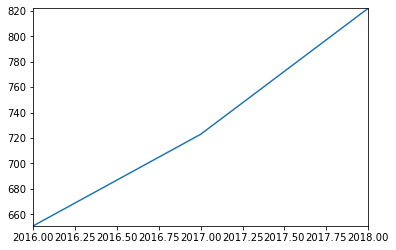

In [21]:
list=[[2010,755],[2011,797],[2012,707],[2013,788],[2014,765],[2015,801],[2016,651],[2017,723],[2018,822]] 
list1=[i[0] for i in list]
list2=[i[1] for i in list]
print(list1,list2)
from matplotlib import pyplot as plt
plt.plot(list1,list2)
plt.axis([2016,2018,651,822])

plt.show()

<AxesSubplot:xlabel='Year'>

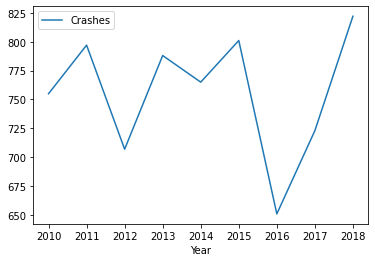

In [22]:
from matplotlib import pyplot as plt
crash_per_year_df.plot('Year','Crashes')

In [53]:
Crashes_per_month=df['Crash Month'].value_counts().rename_axis('Month').reset_index(name='Crashes')
month_dict={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
new_Crashes_per_month=Crashes_per_month.sort_values('Month', key=lambda x: x.apply(lambda x: month_dict[x]))
print(new_Crashes_per_month)

        Month  Crashes
6     January      559
10   February      482
7       March      542
11      April      446
5         May      580
4        June      586
8        July      531
9      August      512
1   September      647
0     October      695
2    November      625
3    December      604


<AxesSubplot:xlabel='Month'>

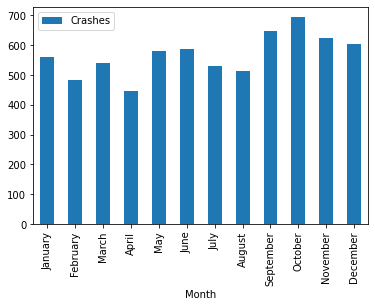

In [78]:
new_Crashes_per_month.plot.bar(x='Month',y='Crashes')

In [61]:
crashes_per_time_of_day=df['Time of Day'].value_counts().rename_axis('Time of the day').reset_index(name='Crashes')
print(crashes_per_time_of_day[0:24])
print(crashes_per_time_of_day.info())


              Time of the day  Crashes
0           6:00 PM - 7:00 PM      535
1           7:00 PM - 8:00 PM      498
2           5:00 PM - 6:00 PM      491
3           3:00 PM - 4:00 PM      461
4           4:00 PM - 5:00 PM      452
5           8:00 PM - 9:00 PM      439
6          9:00 PM - 10:00 PM      353
7           2:00 PM - 3:00 PM      342
8         10:00 PM - 11:00 PM      336
9           7:00 AM - 8:00 AM      314
10  11:00 PM - 12:00 midnight      289
11       12:00 noon - 1:00 PM      273
12          1:00 PM - 2:00 PM      270
13          8:00 AM - 9:00 AM      233
14      11:00 AM - 12:00 noon      231
15        10:00 AM - 11:00 AM      195
16          2:00 AM - 3:00 AM      184
17   12:00 midnight - 1:00 AM      177
18         9:00 AM - 10:00 AM      165
19          1:00 AM - 2:00 AM      159
20          6:00 AM - 7:00 AM      147
21          5:00 AM - 6:00 AM       93
22          3:00 AM - 4:00 AM       89
23          4:00 AM - 5:00 AM       77
<class 'pandas.core.frame

In [108]:
crashes_per_time_of_day['AM/PM/Noon']=crashes_per_time_of_day['Time of the day'].apply(lambda x:x.split()[-1])
del crashes_per_time_of_day['AM/PM/Noon/Midnight']
print(crashes_per_time_of_day)


              Time of the day  Crashes AM/PM/Noon
0           6:00 PM - 7:00 PM      535         PM
1           7:00 PM - 8:00 PM      498         PM
2           5:00 PM - 6:00 PM      491         PM
3           3:00 PM - 4:00 PM      461         PM
4           4:00 PM - 5:00 PM      452         PM
5           8:00 PM - 9:00 PM      439         PM
6          9:00 PM - 10:00 PM      353         PM
7           2:00 PM - 3:00 PM      342         PM
8         10:00 PM - 11:00 PM      336         PM
9           7:00 AM - 8:00 AM      314         AM
10  11:00 PM - 12:00 midnight      289   midnight
11       12:00 noon - 1:00 PM      273         PM
12          1:00 PM - 2:00 PM      270         PM
13          8:00 AM - 9:00 AM      233         AM
14      11:00 AM - 12:00 noon      231       noon
15        10:00 AM - 11:00 AM      195         AM
16          2:00 AM - 3:00 AM      184         AM
17   12:00 midnight - 1:00 AM      177         AM
18         9:00 AM - 10:00 AM      165         AM


In [129]:
sum=0
sum2=0
sum3=0
j=0
for i in crashes_per_time_of_day['AM/PM/Noon']:
    if (i=='PM'):
        sum+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
    elif (i=='AM'):
        sum2+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
    else:
        sum3+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
print(sum,sum2,sum3)

4450 1833 526


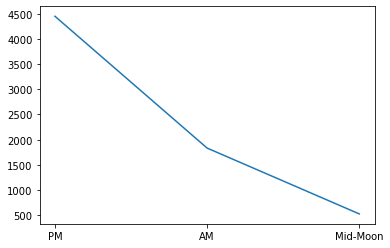

In [134]:
list=[['PM',4450],['AM',1833],['Mid-Moon',526]]
AM_PM=[i[0] for i in list]
Crashes=[i[1] for i in list]
plt.plot(AM_PM,Crashes)
